## Part 1

We will start off by making the Barabasi-Albert network.

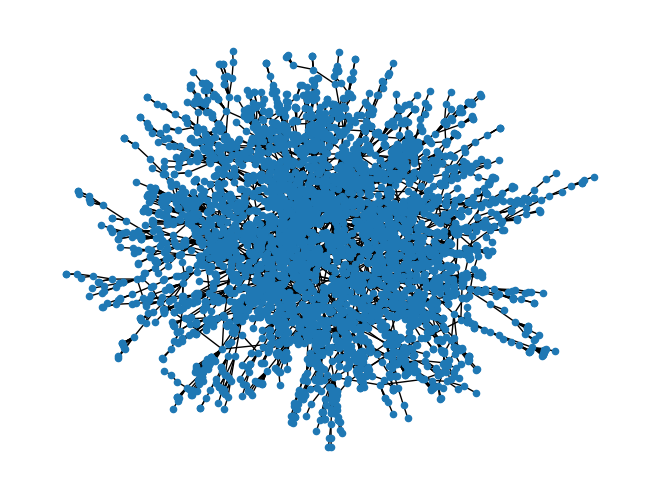

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
G = nx.Graph()
G.add_edge(0,1)
N = 5000
while len(G.nodes) < N:
    node = len(G.nodes)
    edges = list(G.edges())
    flattened = [n for edge in edges for n in edge]
    connected = random.choice(flattened)
    G.add_edge(node,connected)
nx.draw(G,node_size=20)

Afterwards, we'd like to analyze the average degree of neighbors within the network, by choosing a random node within the network

In [ ]:
nodes = list(G.nodes())
i = random.choice(nodes)
print(i)
degree = G.degree[i]
print("Degree of node ", i, ":", degree)
average_degree_neighbours = nx.average_neighbor_degree(G,nodes=[i])
print("Average degree of node ", i, ": ", average_degree_neighbours)

2354
2
{2354: 3.5}


Finally, we'd like to analyze the fraction of times the amount of times out of 1000, that the friendship paradox holds (how often do nodes have a smaller degree than the average of their neighbors' degrees).

In [ ]:
counts = 0
for j in range(1000):
    nodes = list(G.nodes())
    i = random.choice(nodes)
    degree = G.degree[i]
    neighbours = G.neighbors(i)
    average_degree_neighbours = nx.average_neighbor_degree(G,nodes=[i])
    if average_degree_neighbours[i] > degree:
        counts += 1

print(counts/1000)

0.864


More than 86% of the time, the average degree of the neighbours is larger than the degree of the chosen node. 

**What if the power law was flatter eg $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?** 

The maximum degree will be proportional to the number nodes in the network. This means the hubs will grow linearly with the number of nodes in the network. There will be more hubs with higher average degrees, meaning the paradox will on average, hold more often. 

In [ ]:
import networkx as nx
import random
import numpy as np
#Number of nodes
N = 5000
#power law distribution
gamma = 2
#minimum degree
x_min = 1
#degree sequence
degree_seq = []
for n in range(N):
    r = random.uniform(0,1)
    x = int(x_min*(1-r)**(-1/(gamma-1)))
    degree_seq.append(x)

if sum(degree_seq) % 2 != 0:
    degree_seq[0] = degree_seq[0] + 1
G = nx.configuration_model(degree_seq)

counts = 0
for j in range(N):
    nodes = list(G.nodes())
    i = random.choice(nodes)
    degree = G.degree[i]
    neighbours = G.neighbors(i)
    if len(list(neighbours)) == 0:
        continue
    average_degree_neighbours = nx.average_neighbor_degree(G,nodes=[i])
    if average_degree_neighbours[i] > degree:
        counts += 1

print(counts/N)
    
    

0.9638


Over 95% of the time, the paradox holds.

We will now make our configuration model network, and find the fraction of the time the paradox holds.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
F_CM = nx.configuration_model(degrees_fba)

N = 5000
counts = 0
for j in range(N):
    nodes = list(F_CM.nodes())
    i = random.choice(nodes)
    degree = F_CM.degree[i]
    neighbours = F_CM.neighbors(i)
    if len(list(neighbours)) == 0:
        continue
    average_degree_neighbours = nx.average_neighbor_degree(F_CM,nodes=[i])
    if average_degree_neighbours[i] > degree:
        counts += 1

print(counts/N)


0.6378


The F_CM has a lower fraction than the F_BA.

One aspect that might affect the paradox, is community structure. Specifically when talking about friendships, people tend to keep in communities, where most people know each other in between. This means that nodes tend to cluster together. Most likely what happens, is that a few very well-connected nodes connect the different hubs with each other, in a real world network.

For our networks, the BA network might be a lot more connected, while the CM network uses a degree sequence and uses random connections, meaning the clustering and community structures are less likely to happen.

BA networks tend to have hubs connect to lesser connected nodes, meaning the assortiveness is low for these networks. Assortive networks have nodes typically connect to other nodes of similar degrees.

In [ ]:
# Assortativity for BA network
assortativity_BA = nx.degree_assortativity_coefficient(F_BA)
print(f"Assortativity in BA network: {assortativity_BA}")

# Assortativity for CM network
assortativity_CM = nx.degree_assortativity_coefficient(F_CM)
print(f"Assortativity in CM network: {assortativity_CM}")

Assortativity in BA network: -0.0745223158951527
Assortativity in CM network: 0.011318907881070699


Here we can see that the BA network has low assortativity, meaning nodes tend not to connect to other nodes of similar degrees.

To test whether the friendship paradox is actually holding differently for the two networks, we can make many different networks, using both Barabasi-Albert models and configuration models, seeing what the average fraction of the time it is for both networks.


Mean BA:  0.84634
Mean CM:  0.96424
STD BA:  0.022519866784685927
STD CM:  0.0028492806109613115


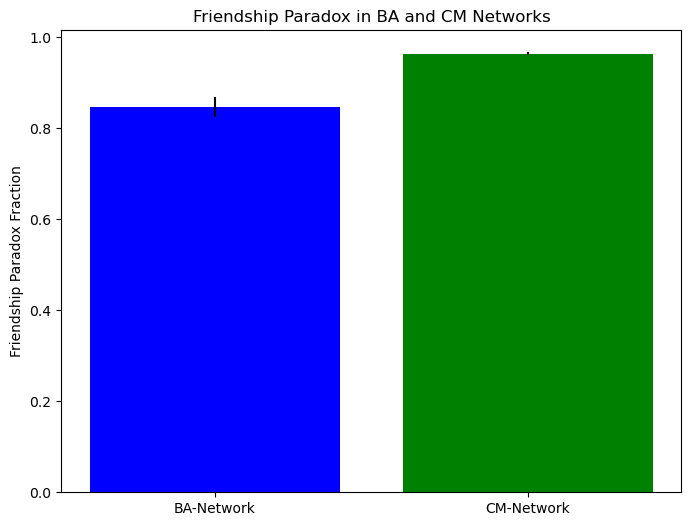

In [ ]:
def count_paradox(graph,N):
    counts = 0
    for j in range(N):
        nodes = list(graph.nodes())
        i = random.choice(nodes)
        degree = graph.degree[i]
        neighbours = graph.neighbors(i)
        if len(list(neighbours)) == 0:
            continue
        average_degree_neighbours = nx.average_neighbor_degree(graph,nodes=[i])
        if average_degree_neighbours[i] > degree:
            counts += 1

    return counts/N


def make_ba_graph(N):
    G = nx.Graph()
    G.add_edge(0,1)
    N = 100
    while len(G.nodes) < N:
        node = len(G.nodes)
        edges = list(G.edges())
        flattened = [n for edge in edges for n in edge]
        connected = random.choice(flattened)
        G.add_edge(node,connected)
    return G
    
def make_cm_graph(ba_graph):
    degrees_seq = [deg for node,deg in ba_graph.degree()]
    G = nx.configuration_model(degree_seq)
    return G


test_amount = 10
test_counts_ba = []
test_counts_cm = []
N = 5000
for test in range(test_amount):
    BA_graph = make_ba_graph(N)
    CM_graph = make_cm_graph(BA_graph)
    fract_ba = count_paradox(BA_graph,N)
    fract_cm = count_paradox(CM_graph,N)
    test_counts_ba.append(fract_ba)
    test_counts_cm.append(fract_cm)

mean_ba = np.mean(test_counts_ba)
mean_cm = np.mean(test_counts_cm)
std_ba = np.std(test_counts_ba)
std_cm = np.std(test_counts_cm)
print("Mean BA: ", mean_ba)
print("Mean CM: ", mean_cm)
print("STD BA: ", std_ba)
print("STD CM: ", std_cm)

plt.figure(figsize=(8, 6))
plt.bar(["BA-Network","CM-Network"], [mean_ba,mean_cm], yerr=[std_ba,std_cm], color=['blue', 'green'])
plt.ylabel('Friendship Paradox Fraction')
plt.title('Friendship Paradox in BA and CM Networks')
plt.show()    

    

To further test these values, we can do a t-test to see if the difference is at all significant:

In [ ]:
from scipy import stats
# Perform a t-test to compare the two networks
t_stat, p_value = stats.ttest_ind_from_stats(mean1=mean_ba, std1=std_ba, nobs1=test_amount, mean2=mean_cm, std2=std_cm, nobs2=test_amount)
print(f"T-statistic: {t_stat}, P-value: {p_value:.12f}")

T-statistic: -16.42477430207612, P-value: 0.000000000003


Since we have an extremely low p-value, the difference between the two values is significant enough to not be random. 

### Growth without preferential attachment

Finally, we can look at networks without preferential attachment. First we want to make our Sune-network:

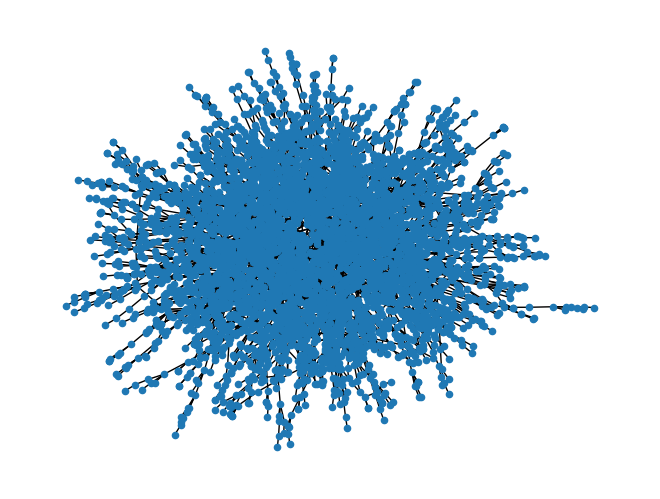

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
#Sune-network
G = nx.Graph()
G.add_edge(0,1)
N = 5000
while len(G.nodes) < N:
    node = len(G.nodes)
    edges = list(G.edges())
    connect = random.sample(list(G.nodes),1)
    G.add_edge(node,connect[0])
nx.draw(G,node_size=20)



Then we make our Erdös-Reyni network, using the values from the Sune-network as inputs:

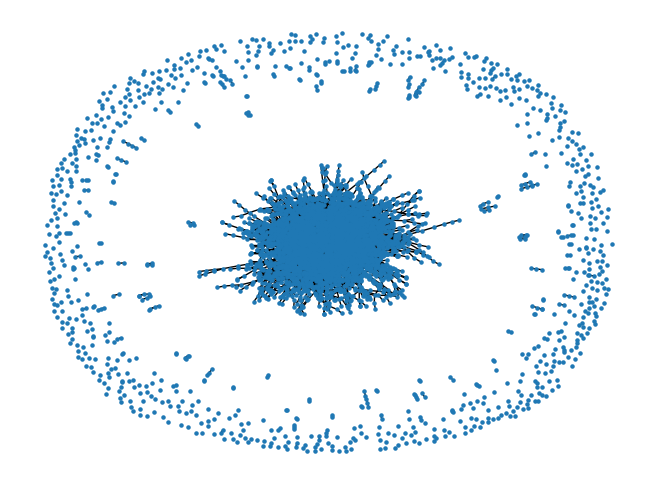

In [ ]:

#ER-network
n_nodes = len(G.nodes)
n_edges = len(G.edges)

# Calculate the probability p for the ER model
p_er = 2 * n_edges / (n_nodes * (n_nodes - 1))
G_er = nx.erdos_renyi_graph(n_nodes,p_er)
nx.draw(G_er,node_size=5)

And then we can plot the degree distributions.

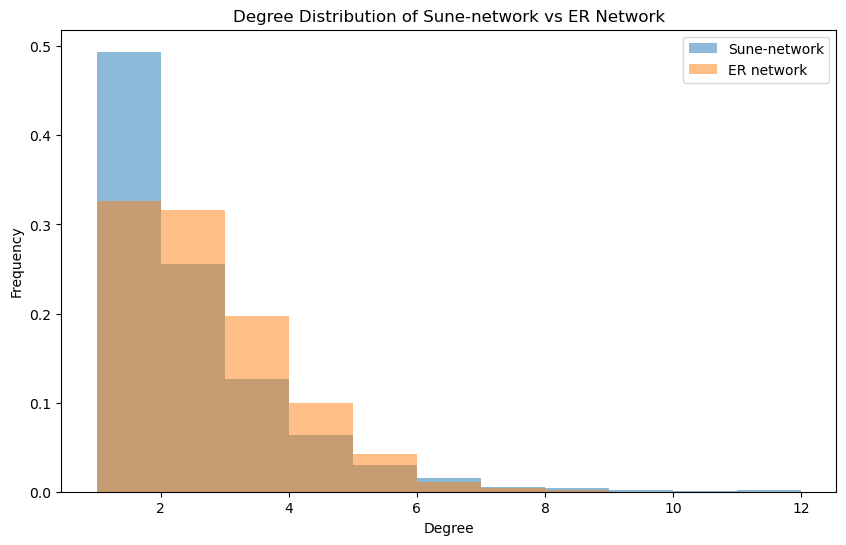

Number of connected components in the Sune-network: 1
Number of connected components in the ER network: 868


In [ ]:
# Step 3: Plot the degree distributions
def plot_degree_distribution(G, label):
    degrees = [G.degree(n) for n in G.nodes]
    plt.hist(degrees, bins=range(1, max(degrees)+1), alpha=0.5, label=label, density=True)

# Plot degree distributions for both networks
plt.figure(figsize=(10, 6))
plot_degree_distribution(G, "Sune-network")
plot_degree_distribution(G_er, "ER network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Sune-network vs ER Network")
plt.legend()
plt.show()

# Step 4: Compare the number of connected components
n_components_sune = nx.number_connected_components(G)
n_components_er = nx.number_connected_components(G_er)

print(f"Number of connected components in the Sune-network: {n_components_sune}")
print(f"Number of connected components in the ER network: {n_components_er}")


The biggest difference, which can also be seen after drawing both networks, is how the Sune-network is one big connected network, while the erdos-reyni network has many unconnected nodes, resulting in many different components to the network. The Sune-network does have many nodes with a low degree, more than the ER network, but the ER network seems to have more evenly distributed degrees.